# Introduction
In this notebook I want to mess around with convolutions and understand their intuition.
I will do it on the tiger image.

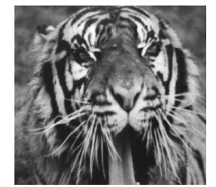

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

orig_img = Image.open("images/tiger.png")
orig_img

## Filters
Let's try to apply some of the built in filters.

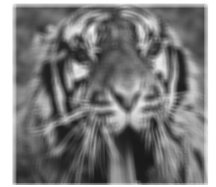

In [2]:
orig_img.filter(ImageFilter.BLUR)

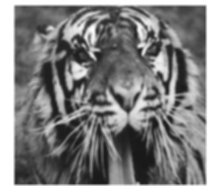

In [3]:
orig_img.filter(ImageFilter.BoxBlur(1))

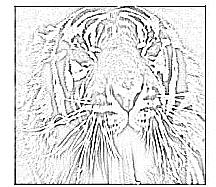

In [4]:
orig_img.filter(ImageFilter.CONTOUR)

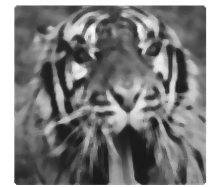

In [131]:
orig_img.filter(ImageFilter.MedianFilter(5))

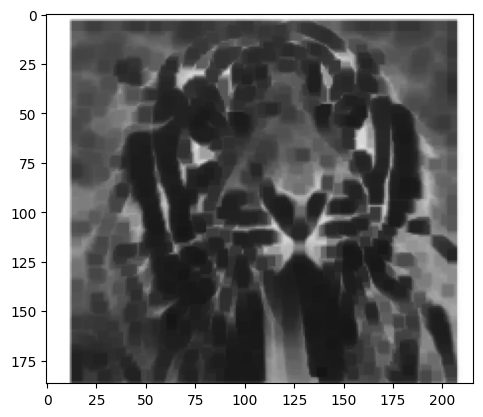

In [37]:
orig_img.filter(ImageFilter.MinFilter(5))

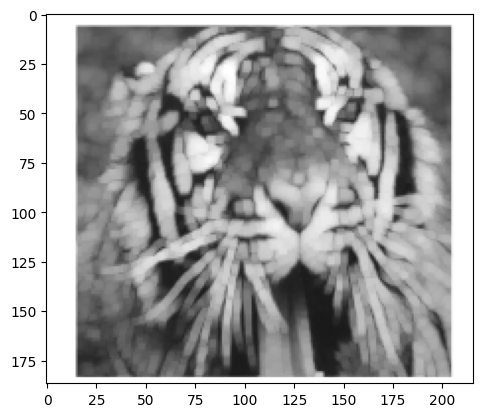

In [38]:
orig_img.filter(ImageFilter.MaxFilter(3))

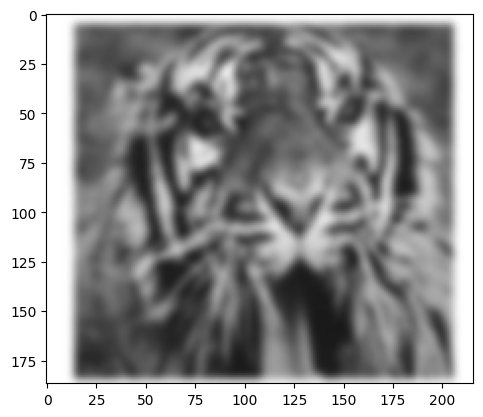

In [40]:
orig_img.filter(ImageFilter.GaussianBlur())

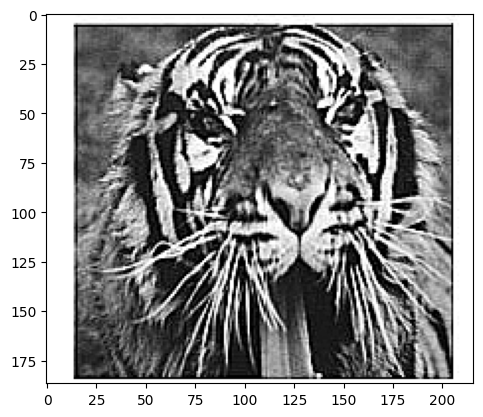

In [41]:
orig_img.filter(ImageFilter.EDGE_ENHANCE)

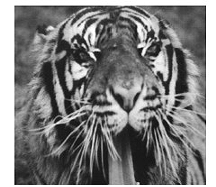

In [178]:
orig_img.filter(ImageFilter.DETAIL)

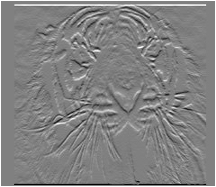

In [3]:
y_derivative_kernel = ImageFilter.Kernel(
    size=(3, 3), kernel=(0, -1, 0, 0, 1, 0, 0, 0, 0), scale=1, offset=128
)

y_gradient = orig_img.convert("L").filter(y_derivative_kernel)
y_gradient

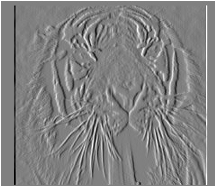

In [4]:
x_derivative_kernel = ImageFilter.Kernel(
    size=(3, 3), kernel=(0, 0, 0, -1, 1, 0, 0, 0, 0), scale=1, offset=128
)

x_gradient = orig_img.convert("L").filter(x_derivative_kernel)
x_gradient

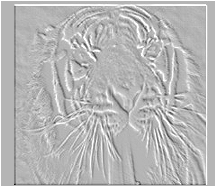

In [227]:
new_img_mat = (
    np.sqrt(
        np.array(x_gradient, dtype=np.float64) ** 2
        + np.array(y_gradient, dtype=np.float64) ** 2
    )
    .clip(0, 255)
    .astype(np.uint8)
)
new_img = Image.fromarray(new_img_mat.astype(np.uint8))
new_img

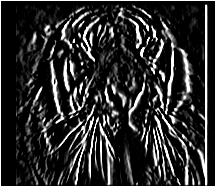

In [55]:
sobel_x_kernel = ImageFilter.Kernel(
    size=(3, 3), kernel=(-1, 0, 1, -2, 0, 2, -1, 0, 1), scale=1, offset=0
)

x_sobel_gradient = orig_img.convert("L").filter(sobel_x_kernel)
x_sobel_gradient

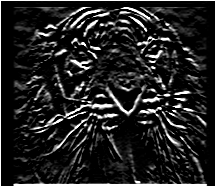

In [56]:
sobel_y_kernel = ImageFilter.Kernel(
    size=(3, 3), kernel=(1, 2, 1, 0, 0, 0, -1, -2, -1), scale=1, offset=0
)

y_sobel_gradient = orig_img.convert("L").filter(sobel_y_kernel)
y_sobel_gradient

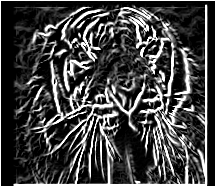

In [57]:
i_x = np.array(x_sobel_gradient, dtype=np.float64)
i_y = np.array(y_sobel_gradient, dtype=np.float64)

mag = np.sqrt(i_x**2 + i_y**2).round().clip(0, 255).astype(np.uint8)
Image.fromarray(mag.astype(np.uint8), mode="L")

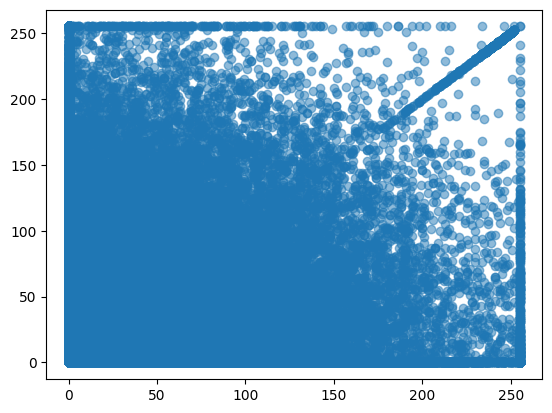

In [79]:
edge_region = Image.open("images/edge_region.png").convert("L")
x_sobel_gradient = edge_region.convert("L").filter(sobel_x_kernel)
y_sobel_gradient = edge_region.convert("L").filter(sobel_y_kernel)
i_x = np.array(x_sobel_gradient, dtype=np.float64)
i_y = np.array(y_sobel_gradient, dtype=np.float64)

plt.scatter(i_x, i_y, alpha=0.5)
plt.show()